# FIFA 19 complete player dataset

# Data downloaded from https://www.kaggle.com/karangadiya/fifa19

# Importing Python Packages

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import PIL as Image
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#import urllib, cStringIO

In [2]:
ScurrentDT = datetime.datetime.now()
print(str(ScurrentDT))

2019-02-25 02:19:06.817211


# FIFA19 Exploratory Data Analysis

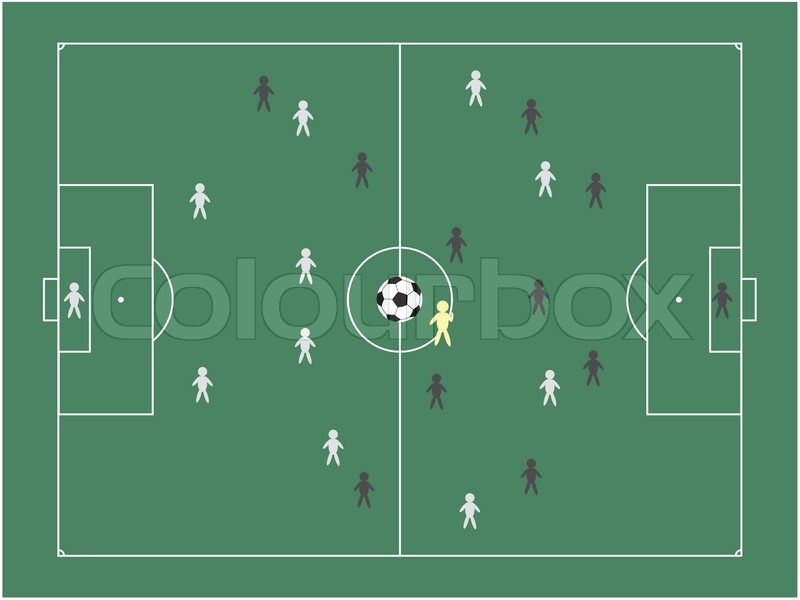

In [3]:
im = Image.Image.open(requests.get('https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX2627441.jpg', stream=True).raw)
im

Reading fifa19 data csv file

In [4]:
fifa19 = pd.read_csv('data.csv',index_col=0)
#fifa19.head()

Deleting Photo,Flag and Club Logo columns from data frame

In [5]:
del fifa19['Photo']
del fifa19['Flag']
del fifa19['Club Logo']

In [6]:
fifa19.shape

(18207, 85)

In [7]:
#fifa19.dtypes

In [8]:
print("FIFA 19 null values count")
#fifa19.isnull().sum()

FIFA 19 null values count


Dropping rows where null values are in Preferred Foot variables or columns

In [9]:
dfifa19= fifa19.dropna(subset=['Preferred Foot'])

In [10]:
print("Before dropping null values: ",len(fifa19))
print("After dropping null values: ",len(dfifa19))
print('Total ',len(fifa19)-len(dfifa19),' rows are dropped')
print("Before updating null values : ",fifa19.shape,"After updating null values : ",dfifa19.shape)

Before dropping null values:  18207
After dropping null values:  18159
Total  48  rows are dropped
Before updating null values :  (18207, 85) After updating null values :  (18159, 85)


#Changing Value,Wage,Release Clause from Object to Interger64 by using split method

In [11]:
dfifa19['ValueChange']=dfifa19['Value'].str.replace('€','')
dfifa19['Valuemeter'] = dfifa19['ValueChange'].str.split('K|M').str[0].astype(float)
dfifa19['mul'] = dfifa19['ValueChange'].str[-1]
dfifa19['PlayerValue'] = np.where(dfifa19['mul']=='K',dfifa19['Valuemeter']*1000,dfifa19['Valuemeter']*1000000)
del dfifa19['Value']
del dfifa19['ValueChange']
del dfifa19['Valuemeter']
del dfifa19['mul']


C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [12]:
dfifa19['ValueChange']=dfifa19['Wage'].str.replace('€','')
dfifa19['Valuemeter'] = dfifa19['ValueChange'].str.split('K|M').str[0].astype(float)
dfifa19['mul'] = dfifa19['ValueChange'].str[-1]
dfifa19['PlayerWage'] = np.where(dfifa19['mul']=='K',dfifa19['Valuemeter']*1000,dfifa19['Valuemeter']*1000000)
del dfifa19['Wage']
del dfifa19['ValueChange']
del dfifa19['Valuemeter']
del dfifa19['mul']

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [13]:
dfifa19['ValueChange']=dfifa19['Release Clause'].str.replace('€','')
dfifa19['Valuemeter'] = dfifa19['ValueChange'].str.split('K|M').str[0].astype(float)
dfifa19['mul'] = dfifa19['ValueChange'].str[-1]
dfifa19['PlayerReleaseClause'] = np.where(dfifa19['mul']=='K',dfifa19['Valuemeter']*1000,dfifa19['Valuemeter']*1000000)
del dfifa19['Release Clause']
del dfifa19['ValueChange']
del dfifa19['Valuemeter']
del dfifa19['mul']
#dfifa19['Valuemeter'] = [re.findall("\d+",i) for i in dfifa19['ValueChange']]# this is for digit to find in string
#dfifa19['Valuemeter1'] = [re.findall(''"w+",i) for i in dfifa19['ValueChange']]# this is for word to find in string when number are their
#dfifa19['Valuemeter']=['.'.join(i) for i in dfifa19['Valuemeter']]
#dfifa19['Valuemeter1'] = [re.findall("M",i) for i in dfifa19['Value']]
#dfifa19['Valuemeter1'] = ['M' if [re.findall("M",i)]==[['M']] else 'K'for i in dfifa19['ValueChange']]
#dfifa19['Valuemeter'] = pd.to_numeric(dfifa19['Valuemeter'])
#dfifa19['Valuemeter']=dfifa19['Valuemeter'].fillna(dfifa19['Valuemeter'].mean())
#dfifa19['Valuemeter'] = dfifa19['Valuemeter'].astype(np.int64)
#dfifa19['ValueChange'].unique()
# dfifa19M = dfifa19[dfifa19['Valuemeter1']=='M']
# dfifa19K = dfifa19[dfifa19['Valuemeter1']=='K']
#dfifa19M['PValue'] = '000000'
#dfifa19M['Valuemeter']=['.'.join(i) for i in dfifa19M['Valuemeter']]
#dfifa19M['PValue1'] = dfifa19M['Valuemeter']*10^6
#dfifa19M
#dfifa19M.head()
# dfifa19M['Valuemeter'].dtypes
#dfifa19M.to_csv('MRaghu.csv')
#dfifa19['Valuemeter1'].unique()
#dfifa19.head()
#dfifa19.to_csv('Raghu.csv')

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Changing Preferred Foot data categorical to numerical data (Left as 1 and Right 2)

In [14]:
dfifa19['Preferred Foot']=np.where(dfifa19['Preferred Foot']=='Left',1,2)
dfifa19['International Reputation']=dfifa19['International Reputation'].astype(np.int64)
dfifa19['Weak Foot']=dfifa19['Weak Foot'].astype(np.int64)

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [15]:
dfifa19.head()

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club  Special  Preferred Foot  International Reputation  \
0         FC Barcelona     2202               1                         5   
1             Juventus     2228               2                         5   
2  Paris Saint-Germain     2143               2                         5   
3    Manchester United     1471               2                         4   
4      Manchester City     2281               2                         4   

          ...          StandingTackle  SlidingTackle GKDiving GKHandling  \
0         ...                    28.0           26.0      6.0       11.0   
1         ...                    31.0           23.0      7.0       11.0   
2         ...                    24.0           33.0      9.0        9.0   
3         ...                    21.0           13.0     90.0       85.0   
4         ...                    58.0           51.0     15.0       13.0   

  GKKicking GKPositioning  GKReflexes  PlayerValue PlayerWage  \
0      15.0          14.0         8.0  110500000.0   565000.0   
1      15.0          14.0        11.0   77000000.0   405000.0   
2      15.0          15.0        11.0  118500000.0   290000.0   
3      87.0          88.0        94.0   72000000.0   260000.0   
4       5.0          10.0        13.0  102000000.0   355000.0   

  PlayerReleaseClause  
0         226500000.0  
1         127100000.0  
2         228100000.0  
3         138600000.0  
4         196400000.0  

[5 rows x 85 columns]

In [16]:
#print("FIFA 19 null values count after droping na from Preferred Foot")
dfifa19.isnull().sum()
#dfifa19.to_csv('MRaghu.csv')

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST                           2037
RS                           2037
LW                           2037
LF                           2037
CF                           2037
RF                           2037
RW            

In [17]:
dfifa19.describe().transpose()

count          mean           std      min  \
ID                        18159.0  2.142796e+05  2.996846e+04     16.0   
Age                       18159.0  2.512253e+01  4.670568e+00     16.0   
Overall                   18159.0  6.624990e+01  6.914613e+00     46.0   
Potential                 18159.0  7.131913e+01  6.134420e+00     48.0   
Special                   18159.0  1.597904e+03  2.728623e+02    731.0   
Preferred Foot            18159.0  1.768104e+00  4.220546e-01      1.0   
International Reputation  18159.0  1.113222e+00  3.940308e-01      1.0   
Weak Foot                 18159.0  2.947299e+00  6.604563e-01      1.0   
Skill Moves               18159.0  2.361308e+00  7.561641e-01      1.0   
Jersey Number             18147.0  1.954610e+01  1.594777e+01      1.0   
Crossing                  18159.0  4.973418e+01  1.836452e+01      5.0   
Finishing                 18159.0  4.555091e+01  1.952582e+01      2.0   
HeadingAccuracy           18159.0  5.229814e+01  1.737991e+01      4.0   
ShortPassing              18159.0  5.868671e+01  1.469950e+01      7.0   
Volleys                   18159.0  4.290903e+01  1.769441e+01      4.0   
Dribbling                 18159.0  5.537100e+01  1.891037e+01      4.0   
Curve                     18159.0  4.717082e+01  1.839526e+01      6.0   
FKAccuracy                18159.0  4.286315e+01  1.747876e+01      3.0   
LongPassing               18159.0  5.271193e+01  1.532787e+01      9.0   
BallControl               18159.0  5.836946e+01  1.668660e+01      5.0   
Acceleration              18159.0  6.461408e+01  1.492778e+01     12.0   
SprintSpeed               18159.0  6.472697e+01  1.464995e+01     12.0   
Agility                   18159.0  6.350361e+01  1.476605e+01     14.0   
Reactions                 18159.0  6.183661e+01  9.010464e+00     21.0   
Balance                   18159.0  6.396657e+01  1.413617e+01     16.0   
ShotPower                 18159.0  5.546005e+01  1.723796e+01      2.0   
Jumping                   18159.0  6.508943e+01  1.182004e+01     15.0   
Stamina                   18159.0  6.321995e+01  1.589474e+01     12.0   
Strength                  18159.0  6.531197e+01  1.255700e+01     17.0   
LongShots                 18159.0  4.710997e+01  1.926052e+01      3.0   
Aggression                18159.0  5.586899e+01  1.736797e+01     11.0   
Interceptions             18159.0  4.669828e+01  2.069691e+01      3.0   
Positioning               18159.0  4.995848e+01  1.952904e+01      2.0   
Vision                    18159.0  5.340090e+01  1.414688e+01     10.0   
Penalties                 18159.0  4.854860e+01  1.570405e+01      5.0   
Composure                 18159.0  5.864827e+01  1.143613e+01      3.0   
Marking                   18159.0  4.728162e+01  1.990440e+01      3.0   
StandingTackle            18159.0  4.769784e+01  2.166400e+01      2.0   
SlidingTackle             18159.0  4.566144e+01  2.128913e+01      3.0   
GKDiving                  18159.0  1.661622e+01  1.769535e+01      1.0   
GKHandling                18159.0  1.639160e+01  1.690690e+01      1.0   
GKKicking                 18159.0  1.623206e+01  1.650286e+01      1.0   
GKPositioning             18159.0  1.638890e+01  1.703467e+01      1.0   
GKReflexes                18159.0  1.671089e+01  1.795512e+01      1.0   
PlayerValue               18159.0  2.416131e+06  5.601319e+06      0.0   
PlayerWage                18159.0  9.752574e+03  2.202440e+04      0.0   
PlayerReleaseClause       16643.0  4.585061e+06  1.111872e+07  13000.0   

                               25%        50%        75%          max  
ID                        200300.0   221743.0   236508.5     246620.0  
Age                           21.0       25.0       28.0         45.0  
Overall                       62.0       66.0       71.0         94.0  
Potential                     67.0       71.0       75.0         95.0  
Special                     1457.0     1635.0     1787.0       2346.0  
Preferred Foot                 2.0        2

In [18]:
dfifa19.corr()

ID       Age   Overall  Potential   Special  \
ID                        1.000000 -0.739162 -0.417354   0.046577 -0.231366   
Age                      -0.739162  1.000000  0.453069  -0.252281  0.236875   
Overall                  -0.417354  0.453069  1.000000   0.661180  0.607236   
Potential                 0.046577 -0.252281  0.661180   1.000000  0.384598   
Special                  -0.231366  0.236875  0.607236   0.384598  1.000000   
Preferred Foot           -0.001241  0.002625 -0.043831  -0.037653 -0.126803   
International Reputation -0.356191  0.253765  0.499491   0.372993  0.292208   
Weak Foot                -0.075784  0.059867  0.212015   0.162346  0.341855   
Skill Moves              -0.056914  0.027649  0.414463   0.354290  0.763412   
Jersey Number             0.182074 -0.241156 -0.218931  -0.010474 -0.133716   
Crossing                 -0.131994  0.130545  0.394972   0.246319  0.866417   
Finishing                -0.082323  0.068660  0.332515   0.243355  0.724244   
HeadingAccuracy          -0.106815  0.147183  0.340776   0.200988  0.644421   
ShortPassing             -0.136279  0.132894  0.502550   0.369189  0.906729   
Volleys                  -0.159915  0.142472  0.391338   0.254906  0.773974   
Dribbling                -0.030340  0.010166  0.372426   0.315019  0.874274   
Curve                    -0.169511  0.143276  0.419491   0.279944  0.851900   
FKAccuracy               -0.199549  0.193467  0.396892   0.230544  0.806414   
LongPassing              -0.186764  0.181310  0.483909   0.321437  0.846302   
BallControl              -0.100184  0.084969  0.460197   0.354396  0.912107   
Acceleration              0.133236 -0.158667  0.196869   0.234608  0.654337   
SprintSpeed               0.132437 -0.151682  0.210647   0.236771  0.645963   
Agility                  -0.019897 -0.019395  0.264952   0.222310  0.699673   
Reactions                -0.408617  0.453124  0.850045   0.513425  0.597169   
Balance                   0.048463 -0.089877  0.103160   0.138025  0.586788   
ShotPower                -0.166133  0.156947  0.441118   0.288318  0.835277   
Jumping                  -0.169369  0.177167  0.264435   0.109151  0.321846   
Stamina                  -0.053895  0.097793  0.365656   0.202563  0.792762   
Strength                 -0.259756  0.332798  0.349326   0.075769  0.192990   
LongShots                -0.161549  0.155096  0.420795   0.266740  0.840049   
Aggression               -0.228329  0.265190  0.395470   0.171174  0.666236   
Interceptions            -0.160602  0.197845  0.321326   0.154908  0.561676   
Positioning              -0.088330  0.082443  0.356493   0.245616  0.824307   
Vision                   -0.215170  0.187422  0.498894   0.348141  0.761992   
Penalties                -0.140657  0.139535  0.341429   0.224281  0.734533   
Composure                -0.384473  0.391023  0.727655   0.440008  0.752331   
Marking                  -0.110198  0.142817  0.286505   0.162801  0.561866   
StandingTackle           -0.085929  0.119745  0.252629   0.143564  0.538802   
SlidingTackle            -0.068409  0.103089  0.222811   0.128980  0.506968   
GKDiving                 -0.105594  0.101277 -0.025937  -0.053446 -0.674637   
GKHandling               -0.111149  0.106419 -0.025062  -0.054672 -0.673625   
GKKicking                -0.106652  0.104964 -0.029372  -0.059061 -0.670254   
GKPositioning            -0.118250  0.116402 -0.017674  -0.052589 -0.668272   
GKReflexes               -0.105778  0.103313 -0.023276  -0.053341 -0.673238   
PlayerValue              -0.138192  0.075147  0.626913   0.576528  0.377800   
PlayerWage               -0.204653  0.141306  0.571720   0.486604  0.347878   
PlayerReleaseClause      -0.124456  0.060760  0.616422   0.586751  0.369321   

                          Preferred Foot  International Reputation  Weak Foot  \
ID                             -0.001241                 -0.356191  -0.075784   
Age                             0.002625                  0.253765   0.059867

In [19]:
text = dfifa19['Name'].unique()

In [20]:
text =""
for i in range(len(dfifa19['Name'].unique())):
    y =dfifa19.iloc[i,1]
    z="".join(y.split())
    text = text+" "+z

In [21]:
#football_mask = np.array(Image.Image.open("football-157931_1280.png"))
football_mask = np.array(Image.Image.open(requests.get('http://www.cndajin.com/data/wls/213/19500701.jpg',stream=True).raw))
#football_mask

In [22]:
football_mask[football_mask == 0] = 255
#football_mask

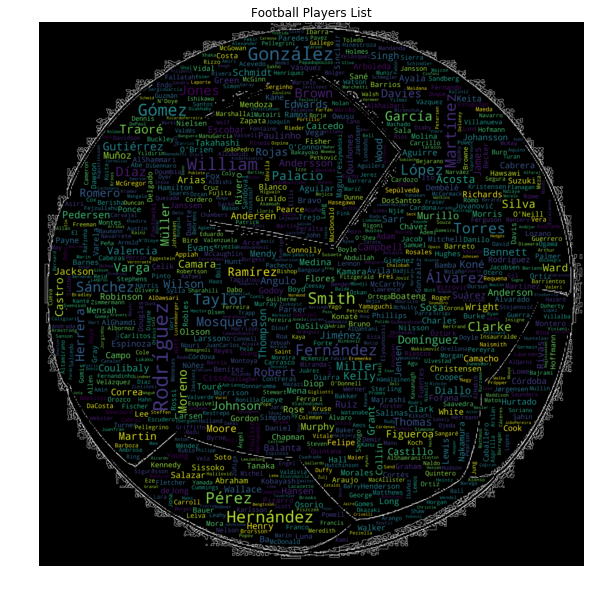

In [23]:
wc = WordCloud(background_color="black", max_words=1000, mask=football_mask, contour_width=3, contour_color='white')#'firebrick')
# Generate a wordcloud
wc.generate(text)
# store to file
wc.to_file("football-157931_1280.png")
# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Football Players List')
plt.show()

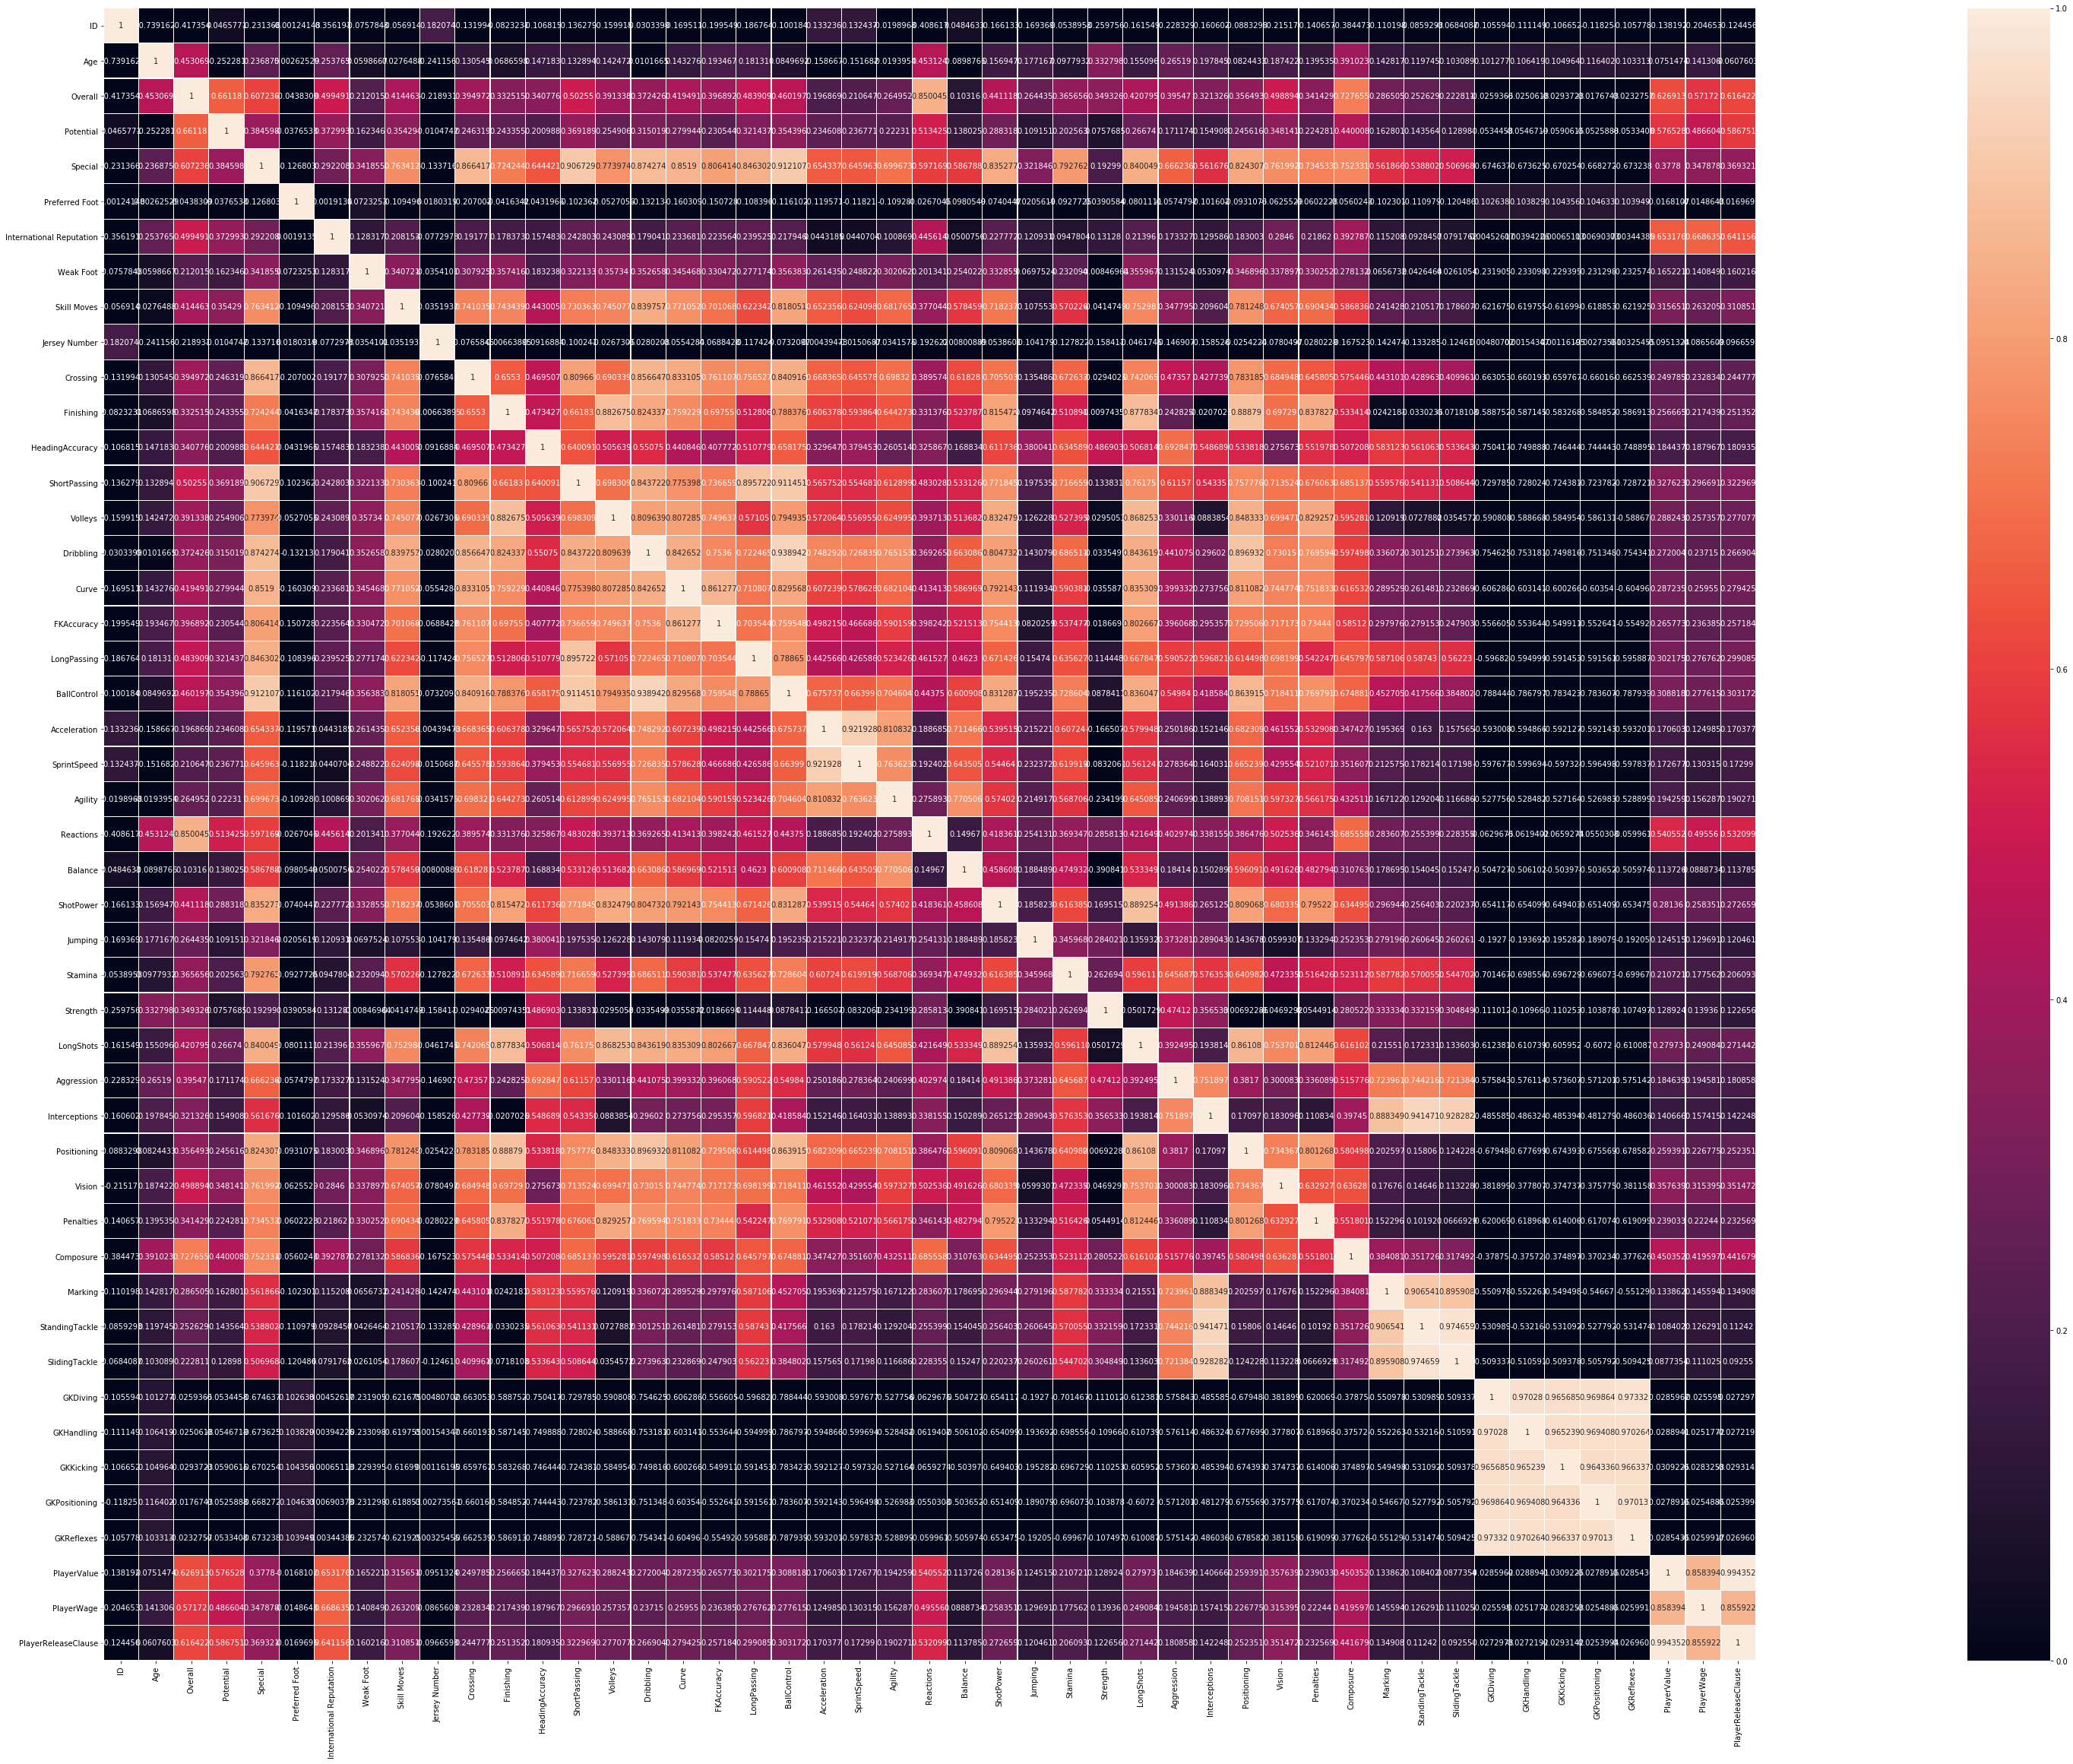

In [25]:
#from matplotlib.ticker import funcformatter
y = dfifa19.corr()
plt.figure(figsize=(100,40))
fmt = lambda x,pos: '{:.0%}'.format(x)
sns.heatmap(y,fmt="g",linewidths=.2,vmin=0, vmax=1,annot=True,square = True) #center=1,
plt.show()
#plt.savefig('Heatmap of dataset')

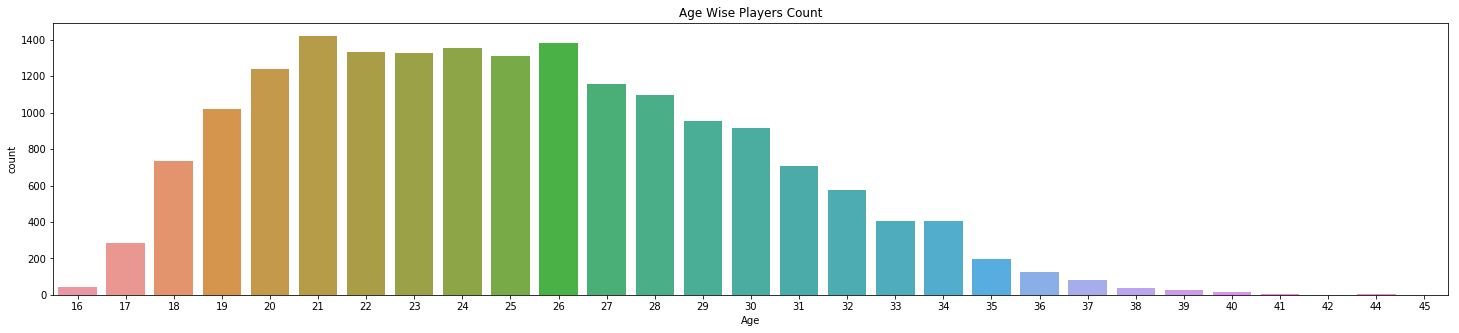

In [26]:
plt.figure(figsize=(25,5))
sns.countplot(x="Age", data=dfifa19).set_title('Age Wise Players Count')
plt.show()

Maximum number of football players are 21 years old and Majority players are between 21 to 26 years old

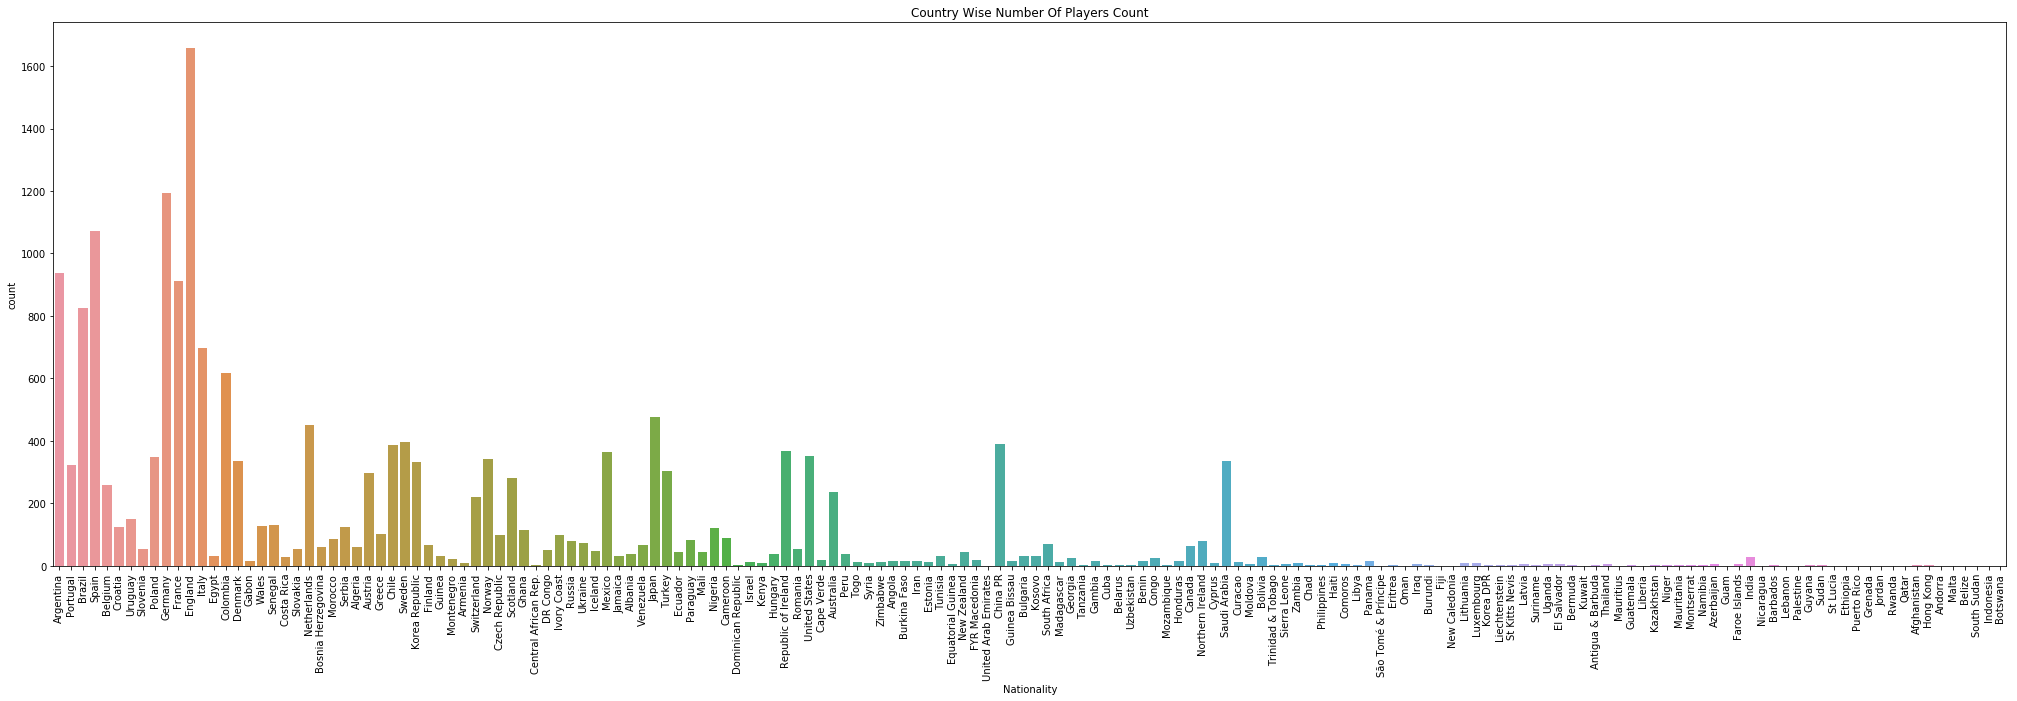

In [27]:
plt.figure(figsize=(35,10))
sns.countplot(x="Nationality", data=dfifa19).set_title('Country Wise Number Of Players Count')
plt.xticks(rotation=90)
plt.show()

Maximum payers are from England

In [ ]:
plt.figure(figsize=(35,10))
sns.barplot(x='Nationality',y='Age',data=dfifa19,hue=dfifa19['Age']).set_title('Country and Age Wise Status')
plt.xticks(rotation=90)
plt.show()

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
plt.figure(figsize=(100,10))
sns.countplot(x="Club", data=dfifa19).set_title('Club Wise Number Of Players Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(100,10))
sns.barplot(x='Club',y='Age',data=dfifa19).set_title('Club and Age Wise Status')#,hue=dfifa19['Age']
plt.xticks(rotation=90)
plt.show()

In [1]:
# plt.figure(figsize=(20,10))
# sns.pairplot(dfifa19[['Age','Overall','Potential','PlayerValue','PlayerWage','PlayerReleaseClause']])
# plt.show()

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\

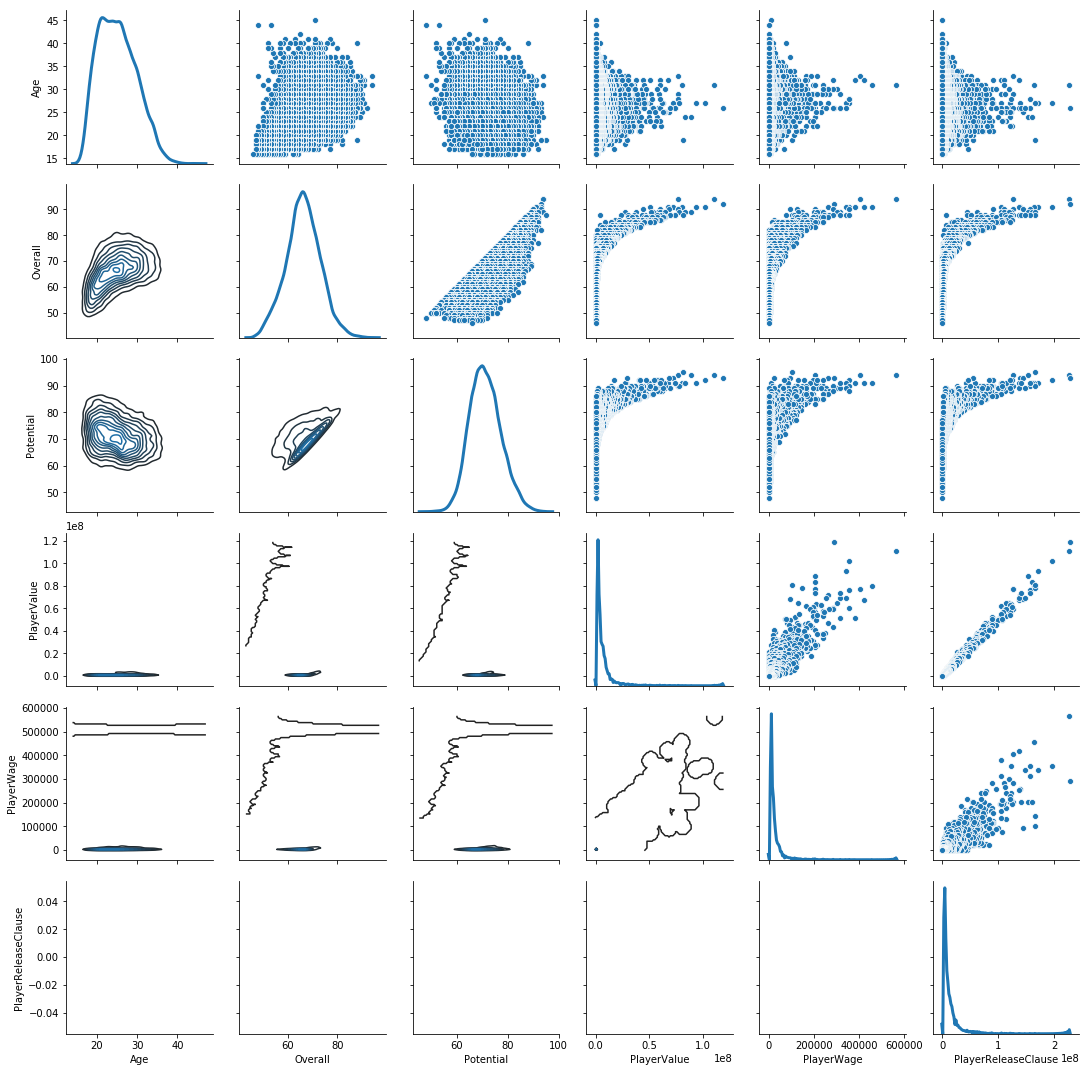

In [115]:
g = sns.PairGrid(dfifa19[['Age','Overall','Potential','PlayerValue','PlayerWage','PlayerReleaseClause']], diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

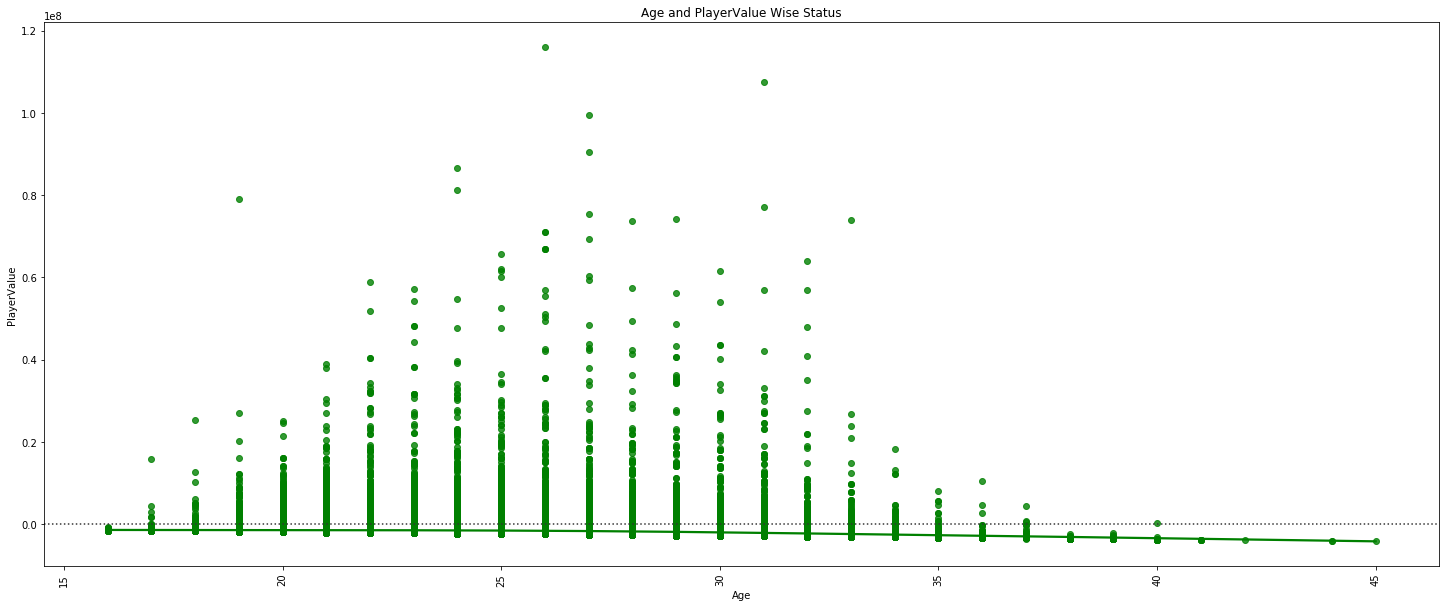

In [116]:
plt.figure(figsize=(25,10))
#sns.boxenplot(x='Age',y='PlayerValue',data=dfifa19).set_title('Age and PlayerValue Wise Status')
#sns.scatterplot(x = school['reduced_lunch'],y = school['school_rating'])
sns.residplot(x='Age', y='PlayerValue',data = dfifa19,lowess=True, color="g").set_title('Age and PlayerValue Wise Status')
plt.xticks(rotation=90)
plt.show()

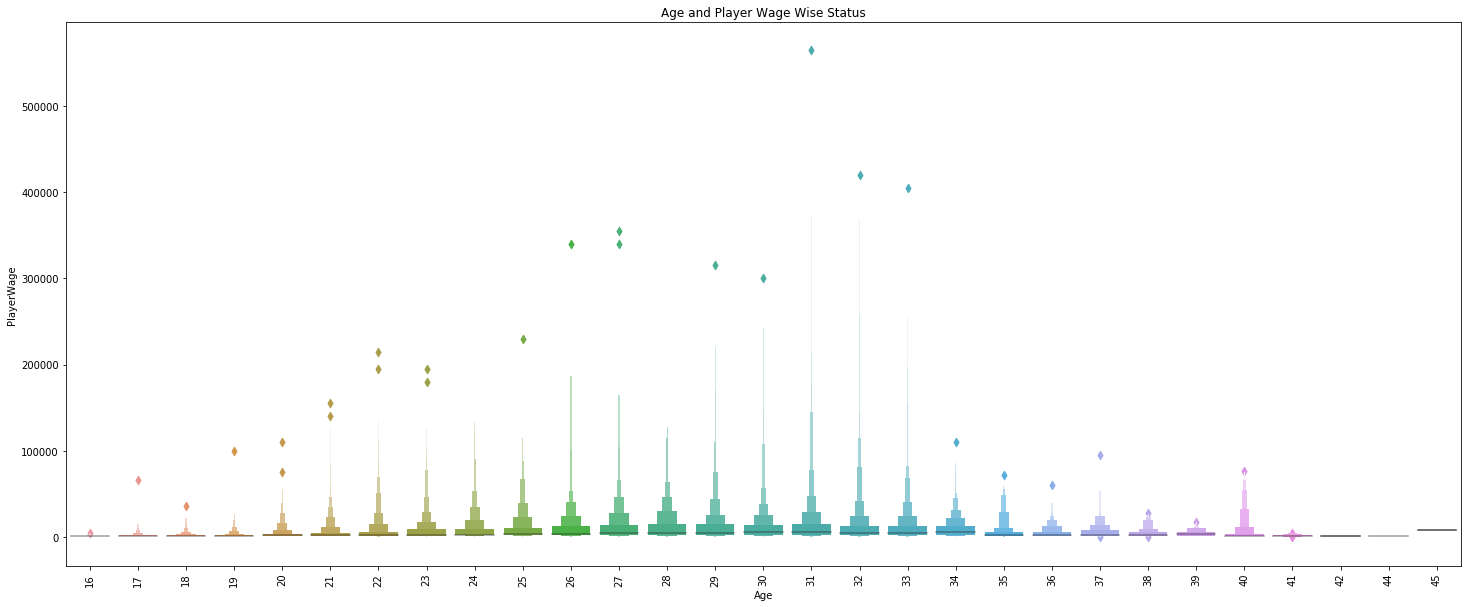

In [117]:
plt.figure(figsize=(25,10))
sns.boxenplot(x='Age',y='PlayerWage',data=dfifa19).set_title('Age and Player Wage Wise Status')
#sns.scatterplot(x = school['reduced_lunch'],y = school['school_rating'])
plt.xticks(rotation=90)
plt.show()

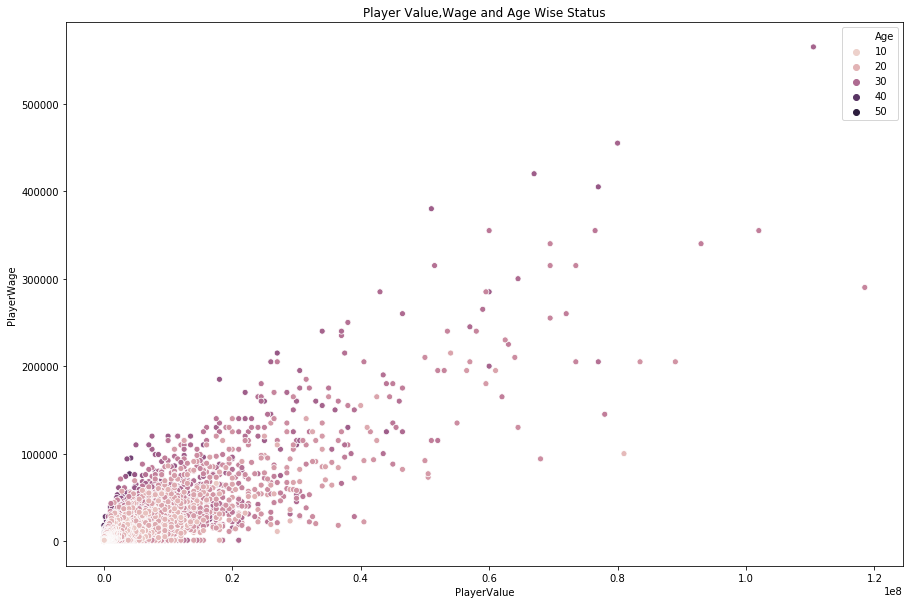

In [118]:
plt.figure(figsize=(15,10))
#sns.boxenplot(x='Age',y='PlayerWage',data=dfifa19)
sns.scatterplot(x = 'PlayerValue',y = 'PlayerWage',data=dfifa19,hue=dfifa19['Age']).set_title('Player Value,Wage and Age Wise Status')
#plt.xticks(rotation=90)
plt.show()

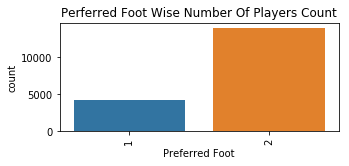

In [119]:
plt.figure(figsize=(5,2))
sns.countplot(x="Preferred Foot", data=dfifa19).set_title('Perferred Foot Wise Number Of Players Count')
plt.xticks(rotation=90)
plt.show()

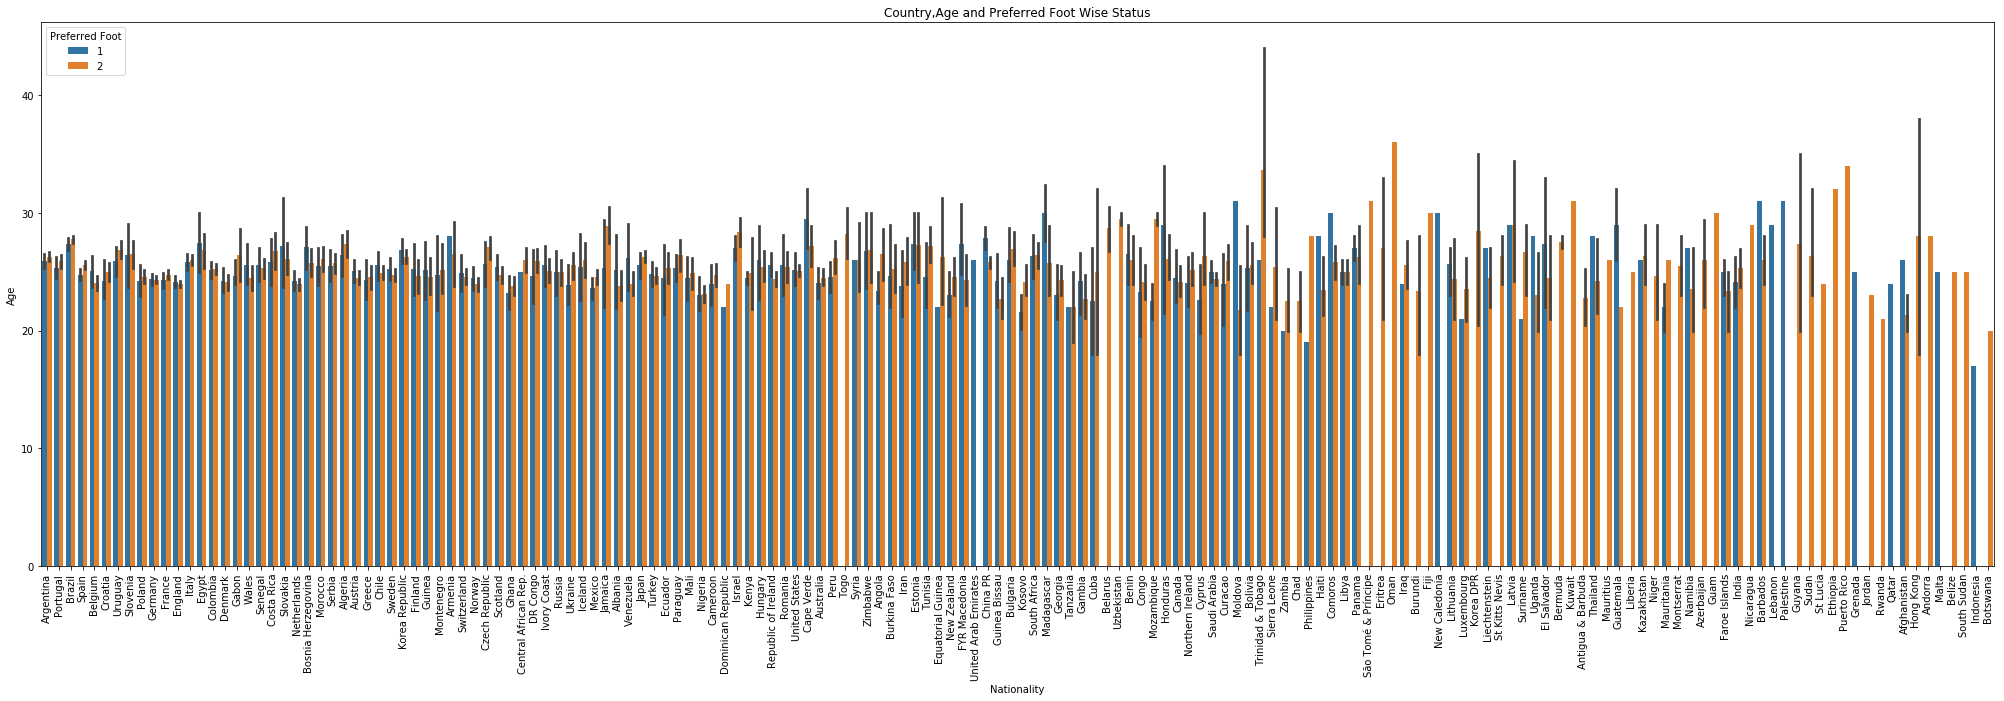

In [120]:
plt.figure(figsize=(35,10))
sns.barplot(x='Nationality',y='Age',data=dfifa19,hue=dfifa19['Preferred Foot']).set_title('Country,Age and Preferred Foot Wise Status')
plt.xticks(rotation=90)
plt.show()

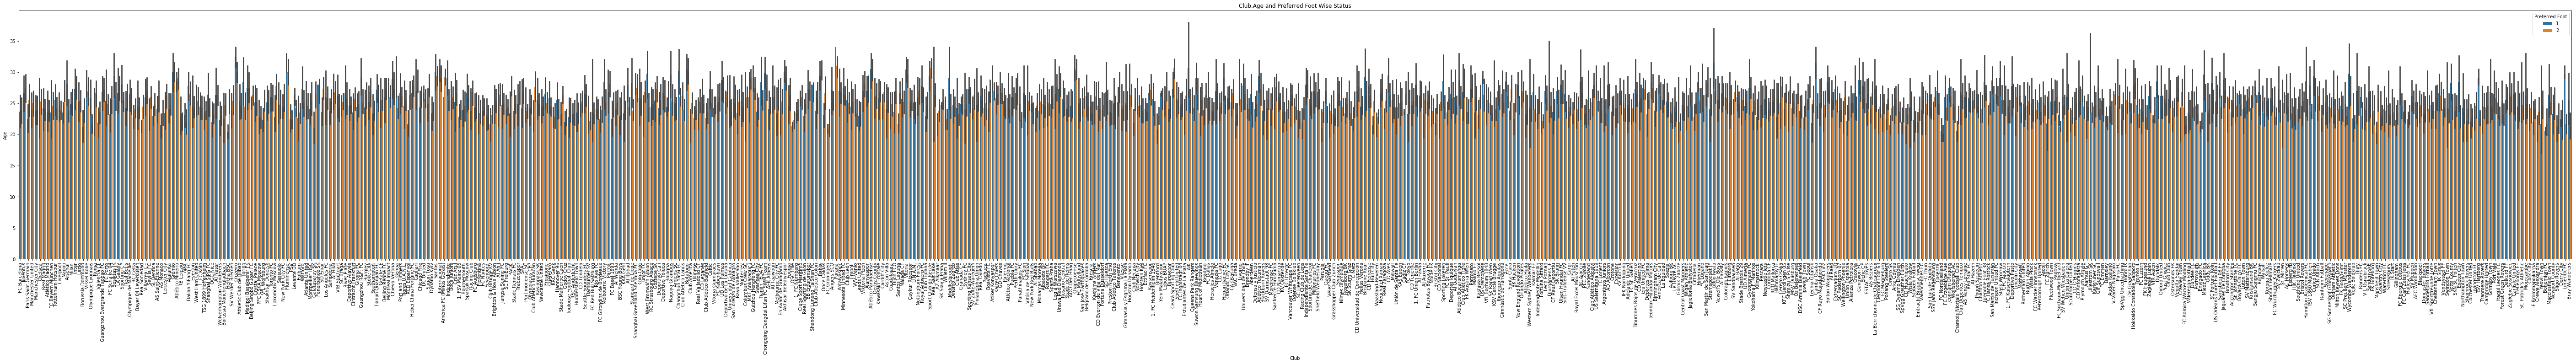

In [121]:
plt.figure(figsize=(100,10))
sns.barplot(x='Club',y='Age',data=dfifa19,hue=dfifa19['Preferred Foot']).set_title('Club,Age and Preferred Foot Wise Status')#,hue=dfifa19['Age']
plt.xticks(rotation=90)
plt.show()

In [126]:
EcurrentDT1 = datetime.datetime.now()
print('Code started from : ',str(ScurrentDT))
print('Code Ended at : ',str(EcurrentDT1))

Code started from :  2019-02-23 10:28:08.734393
Code Ended at :  2019-02-23 10:41:20.655375
